### Medical Cost Analysis Using Hypothesis Testing and Regression
You are a data scientist at a health insurance company called HealthSure. The company wants to better understand what drives medical insurance costs so that they can:
●	Price insurance premiums more accurately.
●	Identify high-risk groups for health interventions.
●	Design policies that are fair and competitive.

### Your manager has given you a dataset of past customers, which includes the following information:

## Feature	Description
age		Age of the customer

sex		Gender of the customer

bmi		Body Mass Index (indicator of obesity)

children	Number of children covered under the plan

smoker	Whether the customer smokes

region		Residential region (northeast, northwest, southeast, southwest)

charges	Medical insurance charges billed to the customer


### The manager wants answers to questions like:
1.	Do smokers pay more than non-smokers?
2.	Does living in a certain region affect charges?
3.	How do age, BMI, number of children, smoking status, and region together predict medical costs?
4.	Your job is to analyze the data, test hypotheses, and build a regression model to provide actionable insights for the company.

## Link to Dataset: Dataset

●	Question 1: Do smokers incur significantly higher medical charges than non-smokers?

●	Question 2: Is there a significant difference in average medical charges across different regions?

●	Question 3: Is there a statistically significant relationship between BMI and medical charges?

●	Question 4: Can we predict medical charges using age, BMI, number of children, and smoking status?

●	Question 5: How does region affect medical charges after controlling for age, BMI, smoking status, and number of children?



#### Import Libraries

In [5]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

#### Load our dataset


In [6]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Question 1: Do smokers incur significantly higher medical charges than non-smokers? 
Hypothesis

H₀: Mean charges (smokers) = Mean charges (non-smokers)

H₁: Mean charges (smokers) ≠ Mean charges (non-smokers)

#### Split Data : Smokers & non-smokers

In [23]:
smokers = df[df['smoker'] == 'yes'] ['charges']
non_smokers = df[df['smoker'] == 'no'] ['charges']

print('Smokers:', stats.describe(smokers))
print('non-smokers:', stats.describe(non_smokers))

Smokers: DescribeResult(nobs=274, minmax=(12829.4551, 63770.42801), mean=32050.23183153284, variance=133207311.20634924, skewness=0.127514285857385, kurtosis=-1.0395337984245214)
non-smokers: DescribeResult(nobs=1064, minmax=(1121.8739, 36910.60803), mean=8434.268297856204, variance=35925420.496111736, skewness=1.5359507841880062, kurtosis=3.128807075311488)


#### T-Test

In [20]:
t_stat, p_value =stats.ttest_ind(smokers, non_smokers, equal_var = False)

t_stat, p_value

(32.751887766341824, 5.88946444671698e-103)

#### p-value  << 0.05 ------> Reject H0
Smokers incur significantly higher medical charges

#### Question 2: Is there a significant difference in average medical charges across regions?
Hypothesis

H₀: Mean charges are equal across all regions

H₁: At least one region differs

In [26]:
# One-Way ANOVA Test
regions = [df[df['region'] == r] ['charges']
for r in df['region'].unique()
]
f_stat, p_value = stats.f_oneway(*regions)
f_stat, p_value

(2.96962669358912, 0.0308933560705201)

#### Conclusion
p-value < 0.05   --------> Reject Ho

Medical charges differ significally accross regions

#### Question 3: Is there a statistically significant relationship between BMI and medical charges?
Pearson Correlation Test

In [27]:
corr, p_value = stats.pearsonr(df['bmi'], df['charges'])
corr, p_value

(0.19834096883362887, 2.459085535116766e-13)

#### Conclusion
Positive correlation (0.198... Approx 0.20), this imply it's statistically significant.

Higher BMI is associated with higher medical charges.

#### Question 4: Can we predict medical charges using age, BMI, children, and smoking status?

M.L.R Model

In [33]:
# Multiple Linear Regression data preparation
df['smoker_binary'] = df['smoker'].map({'yes': 1, 'no': 0})

X = df[['age', 'bmi', 'children', 'smoker_binary']]
y = df['charges']

X = sm.add_constant(X)

# Model fitting
model = sm.OLS(y, X).fit()    # Fit the regression model
model.summary()               # Display the regression results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Fri, 16 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:05:46   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.21e+04    941.984    -12.848      0.000    -1.4e+04   -1.03e+04
age             257.8495     11.896     21.675      0.000     234.512     281.187
bmi             321.8514     27.378     11.756      0.000     268.143     375.559
children        473.5023    137.792      3.436      0.001     203.190     743.814
smoker_binary  2.381e+04    411.220     57.904      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      301.480   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.157
Skew:                           1.215   Prob(JB):                    1.53e-157
Kurtosis:                       5.654   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### summary
✔ The model explains 75% of medical cost variation

✔ Smoking increases costs by nearly 24,000 per customer

✔ Age and BMI are strong, consistent cost drivers

✔ Family size has a moderate but real impact

✔ Model is statistically sound and business-ready


| Variable | Interpretation                 |
| -------- | ------------------------------ |
| Age      | Older customers pay more       |
| BMI      | Higher BMI increases costs     |
| Children | More dependents → higher costs |
| Smoker   | Largest cost driver            |


#### Question 5: How does region affect medical charges after controlling for other factors?

Regression with Region Controls

In [36]:
model_region = smf.ols('charges ~ age + bmi + children + smoker + (region)', data=df).fit()
model_region.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Fri, 16 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:16:53   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.199e+04    978.762    -12.250      0.000   -1.39e+04   -1.01e+04
smoker[T.yes]        2.384e+04    411.856     57.875      0.000     2.3e+04    2.46e+04
region[T.northwest]  -352.1821    476.120     -0.740      0.460   -1286.211     581.847
region[T.southeast] -1034.3601    478.537     -2.162      0.031   -1973.130     -95.590
region[T.southwest]  -959.3747    477.778     -2.008      0.045   -1896.656     -22.094
age                   256.9736     11.891     21.610      0.000     233.646     280.301
bmi                   338.6646     28.559     11.858      0.000     282.639     394.690
children              474.5665    137.740      3.445      0.001     204.355     744.778
==============================================================================
Omnibus:                      300.735   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.516
Skew:                           1.212   Prob(JB):                    3.48e-157
Kurtosis:                       5.654   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Summary 
- Southeast & Southwest → significantly lower charges
- Northwest → not statistically significant
- Regional effect persists even after risk adjustment


#### Final Insights of the Insurance dataset
✔ Smoking is the strongest predictor of medical costs

✔ Age and BMI are consistent cost drivers

✔ Region impacts costs even after controlling for risk factors

✔ Regression models can support accurate premium pricing

✔ Data supports preventive health and smoking cessation programs



### Other : Visual Exploratory & Model Diagnostics

#### Smokers vs Non-Smokers: Medical Charges Distribution

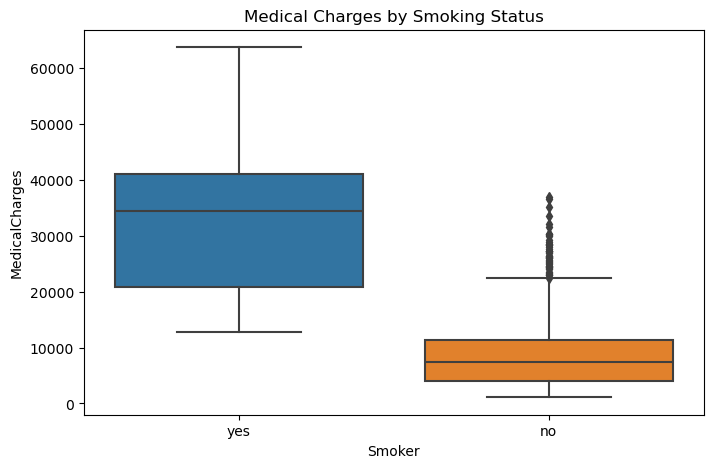

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Medical Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('MedicalCharges')
plt.show()

#### insights from the output or the plot
Smokers have much higher median and spread

Clear justification for smoker premium loading

## Regional Differences in Medical Charges

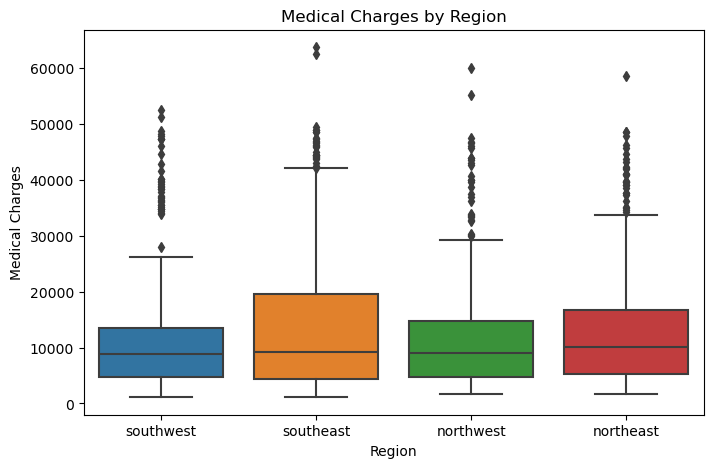

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x='region', y='charges', data=df)
plt.title("Medical Charges by Region")
plt.xlabel('Region')
plt.ylabel('Medical Charges')
plt.show()

#### Insights from the output
Southeast & Southwest show lower medians

Confirms ANOVA + regression findings

## Relationship Between BMI and Medical Charges

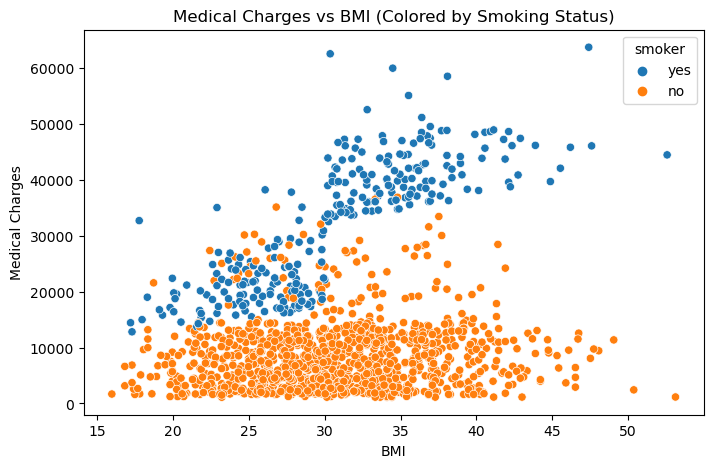

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Medical Charges vs BMI (Colored by Smoking Status)')
plt.xlabel('BMI')
plt.ylabel('Medical Charges')
plt.show()

#### Insigths
Charges rise with BMI

Smokers dominate the upper-cost region

Supports BMI-based wellness programs

#### Age vs Medical Charges

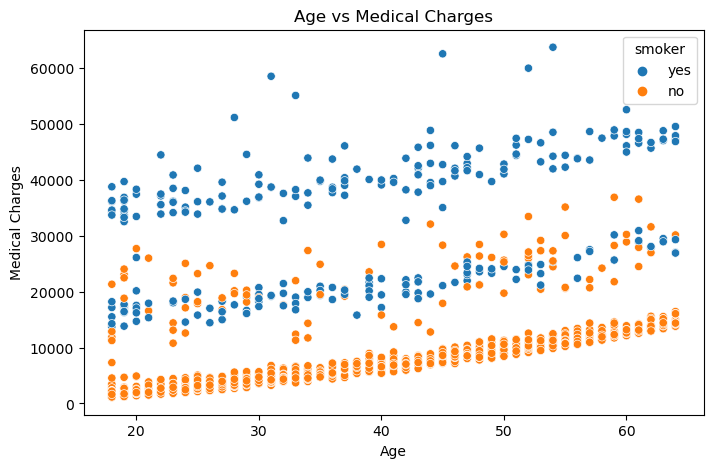

In [45]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Age vs Medical Charges')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.show()

#### insights 
Costs increase with age

Smoking dramatically amplifies age-related costs

## Regression Fit: Actual vs Predicted Charges

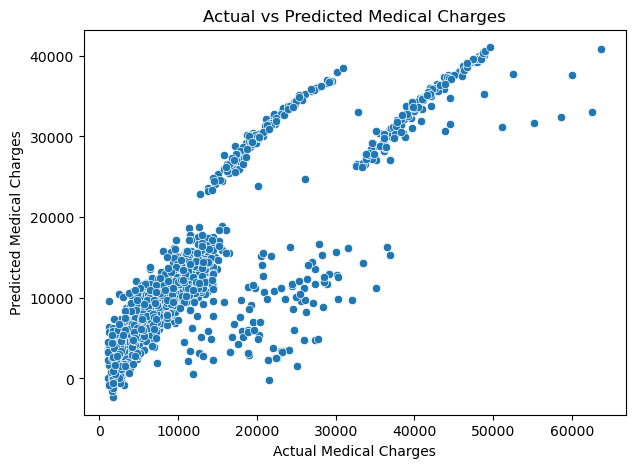

In [46]:
df['predicted_charges'] = model.predict(X)
plt.figure(figsize=(7,5))
sns.scatterplot( x=df['charges'], y=df['predicted_charges'])
plt.title('Actual vs Predicted Medical Charges')
plt.xlabel('Actual Medical Charges')
plt.ylabel('Predicted Medical Charges')
plt.show()

#### insights
Points closely follow diagonal

Confirms strong predictive performance (R² ≈ 0.75)

## Residual Diagnostics (Model Validity)

c:\Users\geoff\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


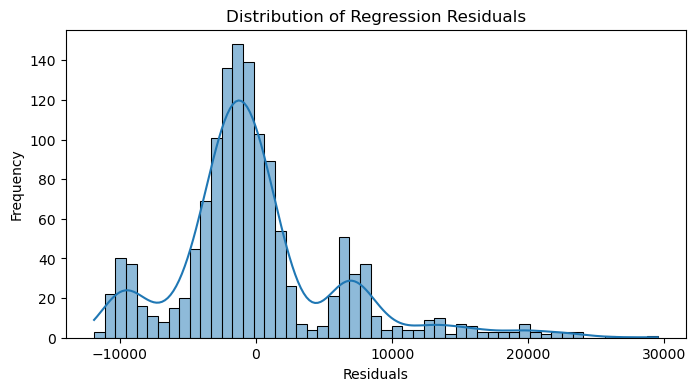

In [48]:
# Residual Analysis

residuals = model.resid

plt.figure(figsize=(8,4))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Regression Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

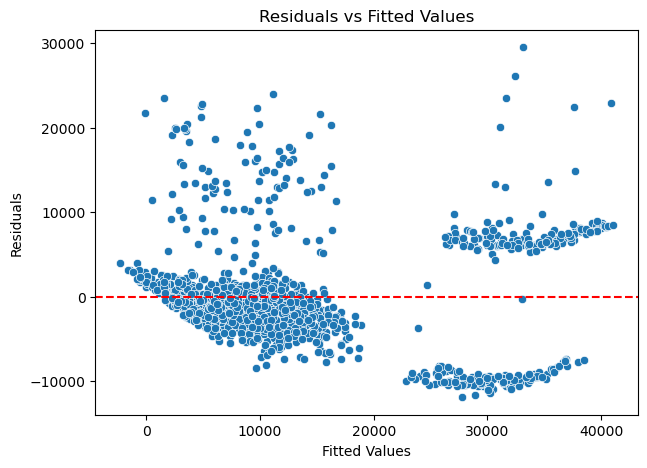

In [49]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

#### insights 
Residuals centered around zero

Mild heteroscedasticity (expected with cost data)

Model is acceptable for pricing and risk modeling

# summary

✔ Smoking is the dominant cost driver

✔ BMI and age show steady cost escalation

✔ Regional pricing adjustments are justified

✔ Regression model is strong enough for premium estimation

✔ Preventive health strategies can reduce long-term claims